### Desafío 1

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import missingno as msngo
import factor_analyzer as factor
from factor_analyzer import FactorAnalyzer
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [27]:
df = pd.read_csv('bfi.csv')

In [28]:
df.head(5)

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


### Desafío 2

In [29]:
df = pd.read_csv('bfi.csv').drop('Unnamed: 0', axis=1)

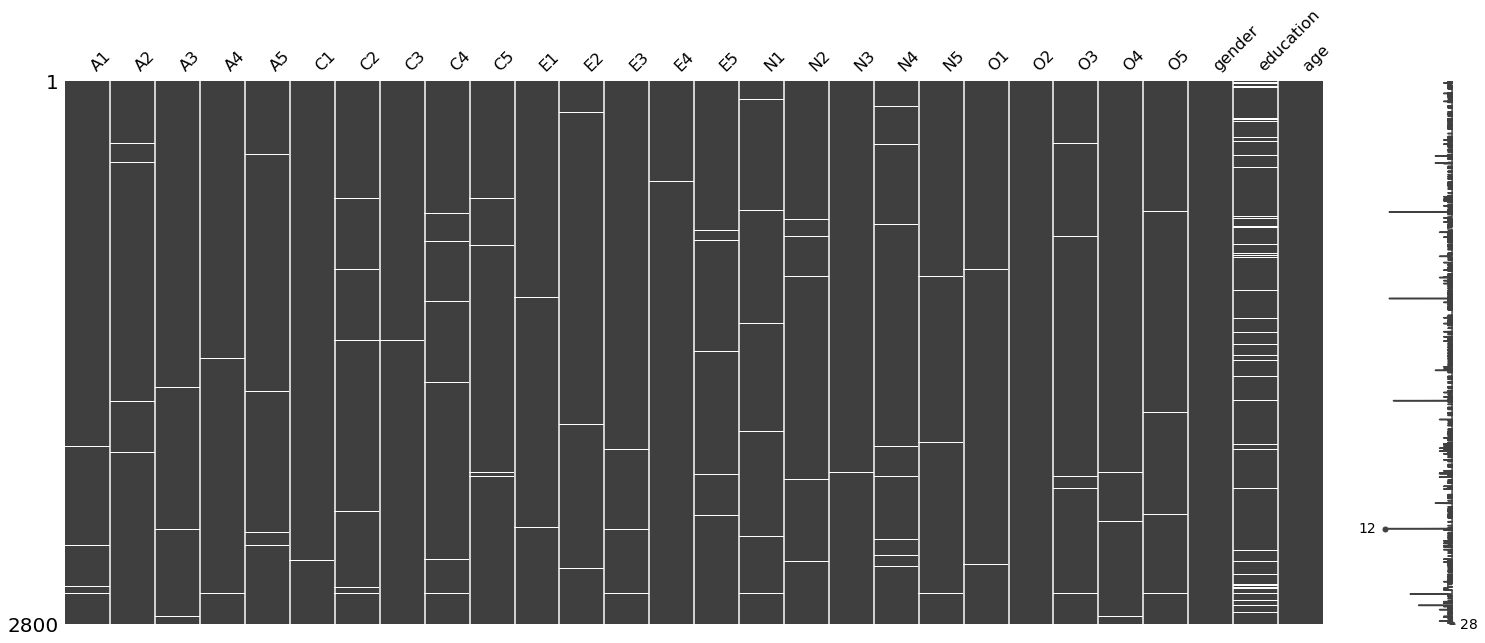

In [30]:
msngo.matrix(df)

* La variable con una mayor tasa de datos perdidos es education.

In [31]:
df = df.dropna()

### Desafío 3

In [7]:
personalidad = df.loc[:, 'A1': 'O5']

In [8]:
preguntas = df.drop(['gender', 'education', 'age'], axis='columns')

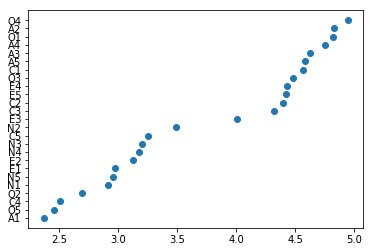

In [9]:
variable = []
mean = []

for colname, serie in preguntas.iteritems():
    variable.append(colname)
    mean.append(serie.mean())
    
df=pd.DataFrame({'var':variable, 'mean':mean}).sort_values(by=['mean'])
plt.plot(df['mean'], df['var'], 'o')

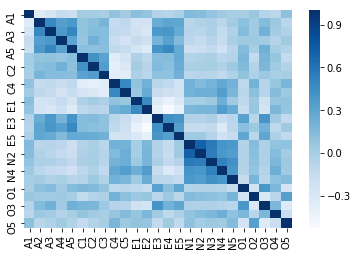

In [10]:
sns.heatmap(preguntas.corr(), cmap='Blues')

### Desafío 4

In [11]:
factor.calculate_bartlett_sphericity(preguntas)

(16484.78165416042, 0.0)

In [12]:
factor.calculate_kmo(preguntas)

(         KMO
 A1  0.738005
 A2  0.834387
 A3  0.871681
 A4  0.870525
 A5  0.900699
 C1  0.838225
 C2  0.788569
 C3  0.849578
 C4  0.823776
 C5  0.861994
 E1  0.841634
 E2  0.883987
 E3  0.893156
 E4  0.878282
 E5  0.894127
 N1  0.778281
 N2  0.778607
 N3  0.860167
 N4  0.886345
 N5  0.860604
 O1  0.855123
 O2  0.783962
 O3  0.833868
 O4  0.781271
 O5  0.758213, 0.8469455121781353)

* La batería de preguntas presenta ideonidad ya que la prueba de esferacidad de errores de Bartlett presenta un valor p menor a 0.05, por lo que existe evidencia para rechazar la hipótesis nula. Además, la prueba de muestreo KMO indica que todos los factores presentan puntajes sobre 0.7.

Text(0.5, 1.0, 'Scree plot')

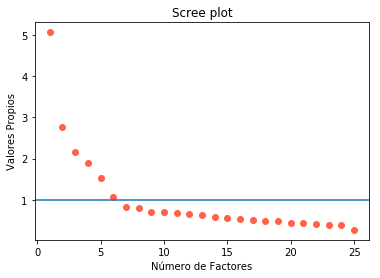

In [13]:
factorize = factor.FactorAnalyzer()
factorize.analyze(preguntas, n_factors=10)
factor_screeplot = factorize.get_eigenvalues()[0]
plt.plot(factor_screeplot.index+1, factor_screeplot.values, 'o', color='tomato')
plt.xlabel('Número de Factores')
plt.ylabel('Valores Propios')
plt.axhline(1)
plt.title('Scree plot')

In [14]:
factorize = factor.FactorAnalyzer()
factorize.analyze(preguntas, n_factors=6)

In [15]:
factor_loadings = factorize.loadings
factor_loadings
factor_loadings.applymap(lambda x: np.where(x < .4, ' ', round(x,2)))

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
A1,,,,,,
A2,,,,,0.64,
A3,,,,,0.49,
A4,,,,,,
A5,,,,,,
C1,,,0.59,,,
C2,,,0.74,,,
C3,,,0.61,,,
C4,,,,,,0.48
C5,,,,,,


* Factor 1 se compone de las preguntas E3 ('Sé cómo cautivar a la gente), E4('Hago amigos de forma fácil) y E5 ('Puedo tomar el cargo de las cosas). Este factor presenta los rasgos de Extroversión.
* Factor 2 se compone de todas las preguntas con etiqueta N:('Me enojo con facilidad, me irrito con facilidad, tengo cambios de humor frecuentes, usualmente me siento melancólico, entro en pánico con facilidad.). Este factor presenta rasgos de Neuroticismo.
* Factor 3 se compone de C1('Soy exacto en mi trabajo'), C2 ('Sigo con mis tareas hasta que todo esté perfecto') y C3('Hago cosas siguiendo un plan'.) Este factor tiene rasgos de Escrupulosidad.
* Factor 4  de O2 ('Evito leer material difícil.') y O5 ('No profundizaré sobre una materia específica'). Rasgos de Apertura.
* Factor 5 de A2 ('Me preocupo del bienestar de otros.) y A3 (Sé cómo confortar a otros.'). Rasgos de Amabilidad.
* Factor 6 de C4 ('Hago cosas con el mínimo esfuerzo.).


### Desafío 5

In [16]:
extract_factor_scores = factorize.get_scores(preguntas)

In [17]:
extract_factor_scores.head()

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
0,1.278885,0.000082,1.456887,-0.345082,-0.075712,0.197475
1,-1.772896,0.847953,-1.511354,0.259958,-1.933897,-1.439791
2,0.214861,-0.170602,-0.245800,0.368220,-0.216188,-0.152733
3,-0.074272,-0.324171,0.336115,0.179683,-1.579546,-0.938386
4,0.226235,-0.879940,-1.347676,-0.325794,0.717053,-0.142754


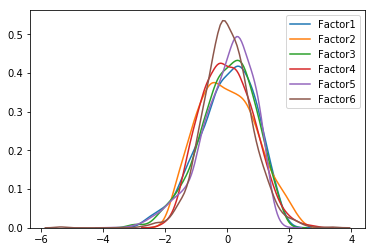

In [18]:
sns.kdeplot(extract_factor_scores.Factor1.dropna())
sns.kdeplot(extract_factor_scores.Factor2.dropna())
sns.kdeplot(extract_factor_scores.Factor3.dropna())
sns.kdeplot(extract_factor_scores.Factor4.dropna())
sns.kdeplot(extract_factor_scores.Factor5.dropna())
sns.kdeplot(extract_factor_scores.Factor6.dropna())

In [34]:
for colnames, serie in extract_factor_scores.iteritems():
    df[str(colnames)] = serie

In [35]:
df.head(1)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,O5,gender,education,age,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,1.0,2,3.0,21,0.315466,0.993684,0.04276,-0.7022,0.906063,1.080357


In [36]:
for i in df.loc[:, 'Factor1':'Factor6']:
    print(i)
    print(smf.ols(i + "~ gender + education + age", df).fit().summary().tables[1])

Factor1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0001      0.111      0.001      0.999      -0.217       0.217
gender         0.0158      0.047      0.339      0.735      -0.075       0.107
education     -0.0067      0.020     -0.331      0.740      -0.046       0.033
age            0.0004      0.002      0.213      0.832      -0.004       0.005
Factor2
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0193      0.114     -0.170      0.865      -0.242       0.204
gender         0.0134      0.048      0.282      0.778      -0.080       0.107
education     -0.0188      0.021     -0.907      0.364      -0.060       0.022
age            0.0016      0.002      0.747      0.455      -0.003       0.006
Factor3
                 coef    std

* Para el factor 1, 2 y 3 la educacion afecta de forma negativa, mientras el resto de variables forma positiva.
* Para el factor 4 y 6, el género afecta de forma negativa, mientras el resto de forma positiva.
* Para el factor 5 todas las variables afectan de forma positiva.